<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: [Olga Daykhovskaya](https://www.linkedin.com/in/odaykhovskaya/), [Yury Kashnitskiy](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #7 (demo)
## <center> Unupervised learning

**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a7-demo-unsupervised-learning) + [solution](https://www.kaggle.com/kashnitsky/a7-demo-unsupervised-learning-solution).**

In this task, we will look at how data dimensionality reduction and clustering methods work. At the same time, we'll practice solving classification task again.

We will work with the [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) dataset. Download the data [here](https://drive.google.com/file/d/14RukQ0ylM2GCdViUHBBjZ2imCaYcjlux/view?usp=sharing). The data comes from accelerometers and gyros of Samsung Galaxy S3 mobile phones ( you can find more info about the features using the link above), the type of activity of a person with a phone in his/her pocket is also known – whether he/she walked, stood, lay, sat or walked up or down the stairs.

First, we pretend that the type of activity is unknown to us, and we will try to cluster people purely on the basis of available features. Then we solve the problem of determining the type of physical activity as a classification problem.

Fill the code where needed ("Your code is here") and answer the questions in the [web form](https://docs.google.com/forms/d/1wBf5UoRndv6PpzIwYnM9f0ysoGa4Yqcqle-HBlBP5QQ/edit).

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use(["seaborn-darkgrid"])
plt.rcParams["figure.figsize"] = (12, 9)
plt.rcParams["font.family"] = "DejaVu Sans"

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [138]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
PATH_TO_SAMSUNG_DATA = "../../data/samsung_HAR"

In [3]:
X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt"))
y_train = np.loadtxt(
    os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train_labels.txt")
).astype(int)

X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test.txt"))
y_test = np.loadtxt(
    os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test_labels.txt")
).astype(int)

In [4]:
# Checking dimensions
assert X_train.shape == (7352, 561) and y_train.shape == (7352,)
assert X_test.shape == (2947, 561) and y_test.shape == (2947,)

For clustering, we do not need a target vector, so we'll work with the combination of training and test samples. Merge `X_train` with `X_test`, and `y_train` with `y_test`.

In [5]:
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

In [6]:
#Checking that everything is merges correctly

print(X_train.shape)
print(X_test.shape)
print(X.shape)

assert (X_train.shape[0] + X_test.shape[0]) == (X.shape[0])

print(y_train.shape)
print(y_test.shape)
print(Y.shape)

assert (y_train.shape[0] + y_test.shape[0]) == (Y.shape[0])

(7352, 561)
(2947, 561)
(10299, 561)
(7352,)
(2947,)
(10299,)


***As assertions did not trigger any exception - everything is fine.***

Define the number of unique values of the labels of the target class.

In [7]:
np.unique(Y)

# So there are 6 different labels

array([1, 2, 3, 4, 5, 6])

In [15]:
df_arr = pd.DataFrame(Y, columns = ['labels'])

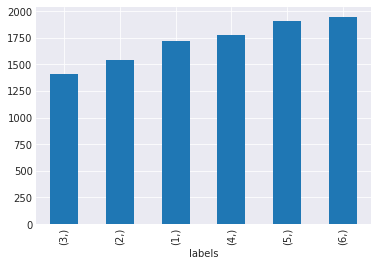

In [90]:
df_arr.value_counts().sort_values().plot.bar();

***The labels are quite close, but not evenly distributed.***

In [8]:
n_classes = np.unique(Y).size

In [9]:
n_classes

6

[These labels correspond to:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 – walking
- 2 – walking upstairs
- 3 – walking downstairs
- 4 – sitting
- 5 – standing
- 6 – laying down

Scale the sample using `StandardScaler` with default parameters.

In [27]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

Reduce the number of dimensions using PCA, leaving as many components as necessary to explain at least 90% of the variance of the original (scaled) data. Use the scaled dataset and fix `random_state` (RANDOM_STATE constant).

In [28]:
PCA?

In [68]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

***The results of PCA can be plotted, but dimensions (components) will be greatly reduced from obtained (e.g. to 2D or 3D, higher dimension is not really plottable).***

In [83]:
import plotly.express as px
fig = px.scatter(X_pca, x=0, y=1, color=df_arr['labels'])
fig.show()


In [84]:
fig = px.scatter_3d(
    X_pca, x=0, y=1, z=2, color=df_arr['labels'])
fig.show()

** Question 1: ** <br>
What is the minimum number of principal components required to cover the 90% of the variance of the original (scaled) data?

**Answer options:**
- 56 
- 65
- 66
- 193

In [86]:
print(X.shape)
print(X_pca.shape)

(10299, 561)
(10299, 65)


***To explain 90% of variance, the used PCA model has reduces the number of components to 65 from 561 (almost by 89% less). So the answer is 2, 65.***

**Question 2:**<br>
What percentage of the variance is covered by the first principal component? Round to the nearest percent.

**Answer options:**
- 45
- 51 
- 56
- 61

In [89]:
print(pca.explained_variance_ratio_.sum() * 100)
print(pca.explained_variance_ratio_[0] * 100)

90.04833346822927
50.73822103501333


***Overall, PCA model explains 90.04% of the variance, however the first component is giving 50.74% contribution to the total. Thus the answer is 2 (51%).***

In [96]:
# Before moving forward, it is worth to notice (and check) that components are sorted by their 
# contribution ("weights").
pca.explained_variance_ratio_[:]

array([0.50738221, 0.06239186, 0.02692564, 0.02452871, 0.01888936,
       0.01631395, 0.01414533, 0.01216211, 0.00985248, 0.00949228,
       0.00858304, 0.0080998 , 0.00765863, 0.00676668, 0.00630242,
       0.00615718, 0.00595335, 0.00577195, 0.00563431, 0.0054083 ,
       0.00518828, 0.00502742, 0.00473229, 0.00463818, 0.00446848,
       0.00439868, 0.00416863, 0.00400809, 0.00389072, 0.00381339,
       0.0036687 , 0.00364357, 0.00349225, 0.00346736, 0.00335539,
       0.00329411, 0.00323824, 0.00300508, 0.00294254, 0.00290452,
       0.00275765, 0.00269864, 0.00264196, 0.0025803 , 0.00255031,
       0.00247776, 0.00245537, 0.0023829 , 0.00235902, 0.00232044,
       0.0022836 , 0.00219182, 0.00212631, 0.00209145, 0.0020348 ,
       0.00201167, 0.00198111, 0.00194391, 0.00192509, 0.00189539,
       0.00186403, 0.00182923, 0.00180956, 0.00176364, 0.00174188])

Visualize data in projection on the first two principal components.

***Actually, I did dynamic visualization above (using both 2 and 3 components), but using different libs. Here I'll do the same, but using given approach.***

In [99]:
# This way is quick, but legendless, so I'll use more "manual" approach below 
F_plot = X_pca[:, 0]
S_plot = X_pca[:, 1]
plt.scatter(F_plot, S_plot, c=Y, s=20, cmap='viridis');

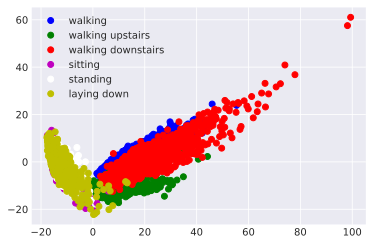

In [139]:
# The result is the same, but with a nice legend
plt.plot(X_pca[Y == 1, 0], X_pca[Y == 1, 1], "bo", label="walking")
plt.plot(X_pca[Y == 2, 0], X_pca[Y == 2, 1], "go", label="walking upstairs")
plt.plot(X_pca[Y == 3, 0], X_pca[Y == 3, 1], "ro", label="walking downstairs")
plt.plot(X_pca[Y == 4, 0], X_pca[Y == 4, 1], "mo", label="sitting")
plt.plot(X_pca[Y == 5, 0], X_pca[Y == 5, 1], "wo", label="standing")
plt.plot(X_pca[Y == 6, 0], X_pca[Y == 6, 1], "yo", label="laying down")
plt.legend(loc=0);

***Also, it is worth to notice, that first two principal components give in total almost 57% of the explanation of the variance.***

In [98]:
print(pca.explained_variance_ratio_[0:2].sum() * 100)

56.977406810209864


**Question 3:**<br>
If everything worked out correctly, you will see a number of clusters, almost perfectly separated from each other. What types of activity are included in these clusters? <br>

**Answer options:**
- 1 cluster: all 6 activities
- 2 clusters: (walking, walking upstairs, walking downstairs ) and (sitting, standing, laying)
- 3 clusters: (walking), (walking upstairs, walking downstairs) and (sitting, standing, laying)
- 6 clusters

***Well, it is easy to see from any of the created plots (2D/3D), that there are 2 clusters - the first one is related to any motion activity (walking in any fashion), while the second one has non-motion activities in it. So, the answer is 2 - 2 clusters.*** 

------------------------------

Perform clustering with the `KMeans` method, training the model on data with reduced dimensionality (by PCA). In this case, we will give a clue to look for exactly 6 clusters, but in general case we will not know how many clusters we should be looking for.

Options:

- ** n_clusters ** = n_classes (number of unique labels of the target class)
- ** n_init ** = 100
- ** random_state ** = RANDOM_STATE (for reproducibility of the result)

Other parameters should have default values.

In [109]:
print(n_classes)

6


In [111]:
kmeans = KMeans(n_clusters=n_classes, n_init=100 ,random_state=RANDOM_STATE).fit(X_pca)

Visualize data in projection on the first two principal components. Color the dots according to the clusters obtained.

In [ ]:
F_plot = X_pca[:, 0]
S_plot = X_pca[:, 1]

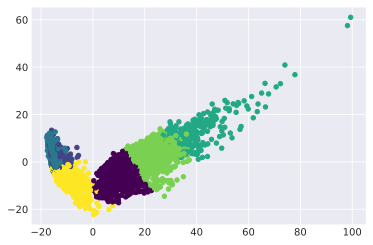

In [140]:
plt.scatter(F_plot, S_plot, c=kmeans.labels_, s=20, cmap='viridis');

***The data distribution stays the same, but clusterization changed significantly. 5 clusters are visually distinguishable now, while the 5th cluster is a mixed one.***

Look at the correspondence between the cluster marks and the original class labels and what kinds of activities the `KMeans` algorithm is confused at.

In [147]:
tab = pd.crosstab(Y, kmeans.labels_, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

cluster1  cluster2  cluster3  cluster4  cluster5  \
walking                     903         0         0        78       741   
going up the stairs        1241         0         0         5       296   
going down the stairs       320         0         0       196       890   
sitting                       1      1235        91         0         0   
standing                      0      1344         0         0         0   
laying                        5        52      1558         0         0   
all                        2470      2631      1649       279      1927   

                       cluster6    all  
walking                       0   1722  
going up the stairs           2   1544  
going down the stairs         0   1406  
sitting                     450   1777  
standing                    562   1906  
laying                      329   1944  
all                        1343  10299

In [148]:
tab_plot = tab.copy()
tab_plot.drop(["all"], axis=1, inplace = True)
tab_plot.drop(["all"], axis=0, inplace = True)

***Barplot makes a nice visualization of the created df with metric. It is clearly seen, that actually no really precise clustering is done (unlike it was seen on the scatterplot).***

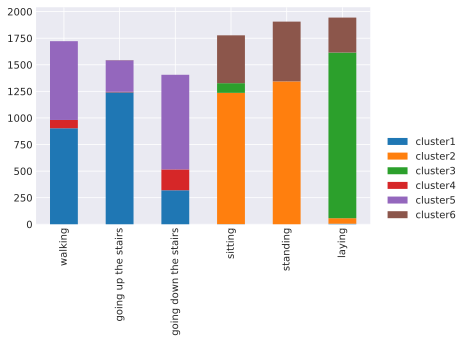

In [151]:
tab_plot.plot.bar(stacked=True);
plt.legend(loc=(1.04,0));


We see that for each class (i.e., each activity) there are several clusters. Let's look at the maximum percentage of objects in a class that are assigned to a single cluster. This will be a simple metric that characterizes how easily the class is separated from others when clustering.

Example: if for class "walking downstairs" (with 1406 instances belonging to it), the distribution of clusters is:
 - cluster 1 - 900
 - cluster 3 - 500
 - cluster 6 - 6,
 
then such a share will be 900/1406 $ \approx $ 0.64.
 

** Question 4: ** <br>
Which activity is separated from the rest better than others based on the simple metric described above? <br>

**Answer:**
- walking
- standing
- walking downstairs
- all three options are incorrect

In [166]:
print(tab["cluster1"]["walking"]/tab["all"]["walking"])
print(tab["cluster2"]["standing"]/tab["all"]["standing"])
print(tab["cluster5"]["going down the stairs"]/tab["all"]["going down the stairs"])

print("Threshold: ", tab["cluster3"]["laying"]/tab["all"]["laying"])

0.524390243902439
0.7051416579223505
0.6330014224751067
Threshold:  0.801440329218107


***Well, from the given options, from one side standing is better clustered, but from another - it is still has a large % of its data in another cluster. So, from the dataframe, visualization and simple manual metric - laying is better clusterized, than any of these 3 given option, thus - answer 4, all 3 options are incorrect.***

It can be seen that kMeans does not distinguish activities very well. Use the elbow method to select the optimal number of clusters. Parameters of the algorithm and the data we use are the same as before, we change only `n_clusters`.

In [167]:
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100 ,random_state=RANDOM_STATE).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\RagingTiger\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



  0%|          | 0/6 [00:00<?, ?it/s]

** Question 5: ** <br>
How many clusters can we choose according to the elbow method? <br>

**Answer options:**
- 1
- 2
- 3
- 4

***One of the ways to do it, described in the materials - is to plot $J(C_k)$.***

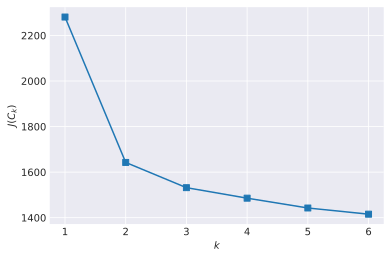

In [169]:
plt.plot(range(1, n_classes + 1), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

***The sharp drop-down is occuring before k = 2, after it the graph decreasing slowly, thus optimal number of clusters is 2 (answer is 2 too).*** <br>
***But there is more math approach too, using the following formula:***

$$ D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

***And everyting is already calculated for it, as inertia contains J(C_k).***

In [176]:
dk = []

for i in range(2, 6):
    dk.append((inertia[i - 1] - inertia[i]) / (inertia[i - 2] - inertia[i - 1]))

In [177]:
dk

[0.1734475356009451,
 0.41688555755862094,
 0.9332195900967476,
 0.6297019542006947]

***So, from all these results - looking for min, which is the first entry, thus the answer is 2 clusters. So, it can be done both visually (via plotting) and analytically (via formula). However clusters with boundary values of number of clusters (1 and 6 here), cannot be calculated by the given formula.***

------------------------

Let's try another clustering algorithm, described in the article – agglomerative clustering.

In [178]:
ag = AgglomerativeClustering(n_clusters=n_classes,
                              linkage='ward').fit(X_pca)

Calculate the Adjusted Rand Index (`sklearn.metrics`) for the resulting clustering and for ` KMeans` with the parameters from the 4th question.

In [179]:
metrics.adjusted_rand_score?

In [181]:
print("KMeans:                   ", metrics.adjusted_rand_score(Y, kmeans.labels_))
print("Agglomerative clustering: ", metrics.adjusted_rand_score(Y, ag.labels_))

KMeans:                    0.4198070012602345
Agglomerative clustering:  0.49362763373004886


** Question 6: ** <br>
Select all the correct statements. <br>

** Answer options: **
- According to ARI, KMeans handled clustering worse than Agglomerative Clustering 
- For ARI, it does not matter which tags are assigned to the cluster, only the partitioning of instances into clusters matters 
- In case of random partitioning into clusters, ARI will be close to zero 

***Well, Agglomerative clustering definitely handled clustering better, thus the first answer is correct (as the ARI is higher).*** <br>

***Adjusted Rand Index (ARI) does not depend on the labels' values but on the data cluster split (by definition of ARI). Thus, yes, it is not really matters which tags will be assigned to the cluster at all. So, second option is true.***

***The third one is trickier. ARI lies in range [-1, 1], where negative nums indicate the independence of splits, and positive indicate that these splits are consistent. A 0 is in-between option, thus it is logical to assume, that it is indicationg random partititon into clusters. I would say yes - true.***

-------------------------------

You can notice that the task is not very well solved when we try to detect several clusters (> 2). Now, let's solve the classification problem, given that the data is labeled.

For classification, use the support vector machine – class `sklearn.svm.LinearSVC`. In this course, we didn't study this algorithm separately, but it is well-known and you can read about it, for example [here](http://cs231n.github.io/linear-classify/#svmvssoftmax).

Choose the `C` hyperparameter for` LinearSVC` using `GridSearchCV`.

- Train the new `StandardScaler` on the training set (with all original features), apply scaling to the test set
- In `GridSearchCV`, specify `cv` = 3.

In [184]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [186]:
LinearSVC?

In [185]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {"C": [0.001, 0.01, 0.1, 1, 10]}

In [188]:
%%time
best_svc = GridSearchCV(svc, svc_params, n_jobs = -1, cv = 3)
best_svc.fit(X_train_scaled, y_train);

Wall time: 32.6 s


C:\Users\RagingTiger\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(cv=3, estimator=LinearSVC(random_state=17), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [189]:
best_svc.best_params_, best_svc.best_score_

({'C': 0.1}, 0.9382506099134881)

**Question 7**<br>
Which value of the hyperparameter `C` was chosen the best on the basis of cross-validation? <br>

**Answer options:**
- 0.001
- 0.01
- 0.1 
- 1
- 10

***The best C for such cross-validation is 0.1 (answer 3).***

In [190]:
y_predicted = best_svc.predict(X_test_scaled)

In [191]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['walking', 'climbing up the stairs',
              'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['walking', 'climbing up the stairs',
              'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab

walking  climbing up the stairs  \
walking                     479                      11   
climbing up the stairs        4                     465   
going down the stairs         1                       2   
sitting                       0                       4   
standing                      0                       0   
laying                        0                       0   
all                         484                     482   

                        going down the stairs  sitting  standing  laying   all  
walking                                     4        2         0       0   496  
climbing up the stairs                      1        1         0       0   471  
going down the stairs                     416        1         0       0   420  
sitting                                     0      433        52       2   491  
standing                                    0       16       516       0   532  
laying                                      0        0         6     531   537  
all                                       421      453       574     533  2947

** Question 8: ** <br>
Which activity type is worst detected by SVM in terms of precision? Recall?<br>

**Answer options:**
- precision – going up the stairs, recall – laying
- precision – laying, recall – sitting
- precision – walking, recall – walking
- precision – standing, recall – sitting 

***So, precision = $TP/(TP + FP)$*** <br>
***Recall = $TP/(TP + FN)$***

***TP - true positive, FP - false positive, FN - false negative***

In [196]:
print("1st option. Precision 'going up the stairs' ", 416 / 421)
print("1st option. Recall 'laying' ", 531 / 537)

print("2nd option. Precision 'laying' ", 531 / 533)
print("2nd option. Recall 'sitting' ", 433 / 491)

print("3rd option. Precision 'walking' ", 479 / 484)
print("3rd option. Recall 'walking' ", 479 / 496)


print("4th option. Precision 'sitting' ", 433 / 453)
print("4th option. Recall 'sitting' ", 433 / 491)

1st option. Precision 'going up the stairs'  0.9881235154394299
1st option. Recall 'laying'  0.9888268156424581
2nd option. Precision 'laying'  0.9962476547842402
2nd option. Recall 'sitting'  0.8818737270875764
3rd option. Precision 'walking'  0.9896694214876033
3rd option. Recall 'walking'  0.9657258064516129
4th option. Precision 'sitting'  0.9558498896247241
4th option. Recall 'sitting'  0.8818737270875764


***Column/row "all" very nicely allows to calculate (already calculated there)  denominators of both precision and recall.***

In [202]:
# Nicer, auto version:

for i in tab.columns[:-1]:
    print(f"{i} precision: ", tab[i][i]/tab[i]["all"])
    print(f"{i} recall: ", tab[i][i]/tab["all"][i])

walking precision:  0.9896694214876033
walking recall:  0.9657258064516129
climbing up the stairs precision:  0.9647302904564315
climbing up the stairs recall:  0.9872611464968153
going down the stairs precision:  0.9881235154394299
going down the stairs recall:  0.9904761904761905
sitting precision:  0.9558498896247241
sitting recall:  0.8818737270875764
standing precision:  0.8989547038327527
standing recall:  0.9699248120300752
laying precision:  0.9962476547842402
laying recall:  0.9888268156424581


***So, the worst predicted pair is: precision – standing, recall – sitting (answer is 4). But overall results are quite good.***

Finally, do the same thing as in Question 7, but add PCA.

- Use `X_train_scaled` and` X_test_scaled`
- Train the same PCA as before, on the scaled training set, apply scaling to the test set
- Choose the hyperparameter `C` via cross-validation on the training set with PCA-transformation. You will notice how much faster it works now.

** Question 9: ** <br>
What is the difference between the best quality (accuracy) for cross-validation in the case of all 561 initial characteristics and in the second case, when the principal component method was applied? Round to the nearest percent. <br>

** Options: **
- quality is the same
- 2%
- 4%
- 10%
- 20%

In [204]:
pca_q9 = PCA(n_components=0.9, random_state=RANDOM_STATE)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

In [206]:
svc_q9 = LinearSVC(random_state=RANDOM_STATE)
svc_params_q9 = {"C": [0.001, 0.01, 0.1, 1, 10]}

In [212]:
import warnings
warnings.filterwarnings("ignore")


best_svc_pca_q9 = GridSearchCV(svc_q9, svc_params_q9, n_jobs=1, cv=3)
best_svc_pca_q9.fit(X_pca_train, y_train);

In [213]:
best_svc_pca_q9.best_params_, best_svc_pca_q9.best_score_

({'C': 1}, 0.8998943094169531)

In [215]:
print("cross-validation ", best_svc.best_score_)
print("principal component method ", best_svc_pca_q9.best_score_)

cross-validation  0.9382506099134881
principal component method  0.8998943094169531


In [218]:
round((best_svc.best_score_ - best_svc_pca_q9.best_score_) * 100)

4

***The accuracy has gone down by 4% in the model, using PCA. But is was a bit quicker.***

** Question 10: ** <br>
Select all the correct statements:

** Answer options: **
- Principal component analysis in this case allowed to reduce the model training time, while the quality (mean cross-validation accuracy) suffered greatly, by more than 10%
- PCA can be used to visualize data, but there are better methods for this task, for example, tSNE. However, PCA has lower computational complexity 
- PCA builds linear combinations of initial features, and in some applications they might be poorly interpreted by humans 

***The first one is not true, mean cross-validation accuracy suffered by 4%, not by 10%. But yes, there is a such "training time-accuracy" trade-off. Overall the option is false.*** <br>
***PCA can be definitely used to visualize the data, but the rest can be checked by applying TSNE to the given dataset:***

In [219]:
from sklearn.manifold import TSNE

In [222]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_norm)

Wall time: 1min 1s


In [229]:
tsne_repr.shape

(10299, 2)

In [232]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df_arr["labels"].map({1: "blue", 2: "orange", 3: "green", 4: "yellow",
                            5: "purple", 6: "red"}),
    alpha=0.5,);

***So, tSNE has greater running time and, thus computational complexity is higher. The picture is somehow better, I think, yet both PCA and tSNE can be used. But in general the whole second option is true.***

***PCA is creating linear combinations of initial features, but I cannot be really sure about poor interpretation. Solutions, however, are saying yes, and providing and example of:  0.574 * salary + 0.234 * num_children, but I've thought that such a problem can be common for many other tasks (regressions too). The 3rd statement is true, then.***